In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [2]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(312,2,144)
loaded_mask = load_mask.reshape(312,2,144)

In [3]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(len(clean_data))

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(len(clean_voltages))

312
312


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


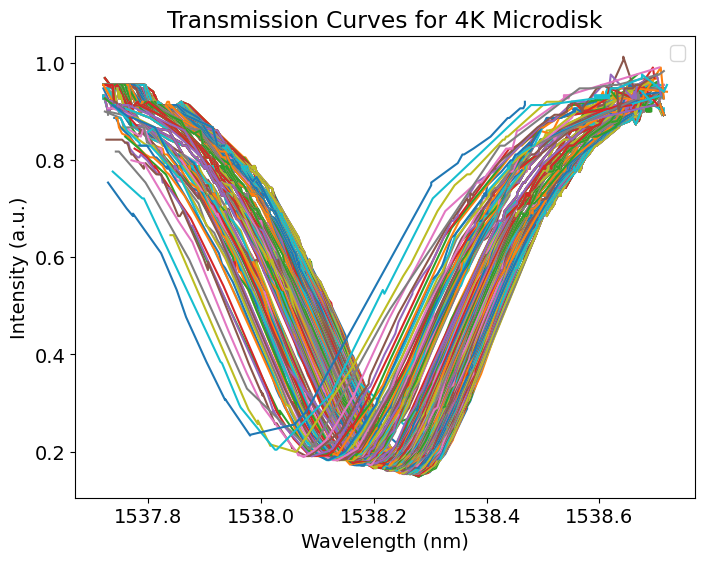

In [4]:
#lets regraph again
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.show()

In [5]:
random_number = 1735 #best for r values
radius = 1.75e-6
print(np.exp(-(random_number*2*math.pi*radius)/2))

0.9905066880262325


In [6]:
#function for transmission in an all pass ring

#function that seems to work now changing names
def Tsymthru(wavelength, neff, r, abscoef_power, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [7]:
#function with two inputs near 1  --> doesn't work for either
# def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#original function --> doesn't work for alpha
# def Tsymthru(wavelength, neff, abscoef_power, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function that seems to work for weird names
# def Tsymthru(wavelength, neff, round_trip_loss_field, random_number, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     r=np.exp(-(random_number*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function with switched variables --> doesn't work for alpha
# def Tsymthru(wavelength, neff, r, abscoef_power, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

In [8]:
print(clean_data[0][0])

[1537.7227700831024 1537.7366204986145 1537.7393905817169
 1537.7421606648193 1537.7449307479217 1537.747700831024
 1537.7504709141265 1537.7532409972289 1537.7560110803313
 1537.7587811634337 1537.761551246536 1537.7643213296385 1537.767091412741
 1537.7698614958433 1537.7726315789457 1537.7754016620481
 1537.7781717451505 1537.780941828253 1537.7837119113553
 1537.7864819944577 1537.7892520775601 1537.7920221606626
 1537.808642659277 1537.8114127423794 1537.8114127423794 1537.822493074789
 1537.822493074789 1537.8252631578914 1537.8280332409938
 1537.8308033240962 1537.8335734071986 1537.836343490301
 1537.8391135734034 1537.8418836565058 1537.8446537396082
 1537.8474238227107 1537.850193905813 1537.8529639889155
 1537.8557340720179 1537.8585041551203 1537.8723545706323
 1537.985927977831 1537.985927977831 1537.9886980609333 1537.9886980609333
 1537.9914681440357 1537.9970083102405 1538.0163988919574
 1538.0191689750598 1538.0219390581622 1538.0219390581622
 1538.0995013850295 1538.1

In [9]:
n = 0
def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, 0.9959, abscoef_power, 1.75e-6) #1.75 not 10
x = np.ma.masked_array(clean_data[n][0])
y = np.ma.masked_array(clean_data[n][1])


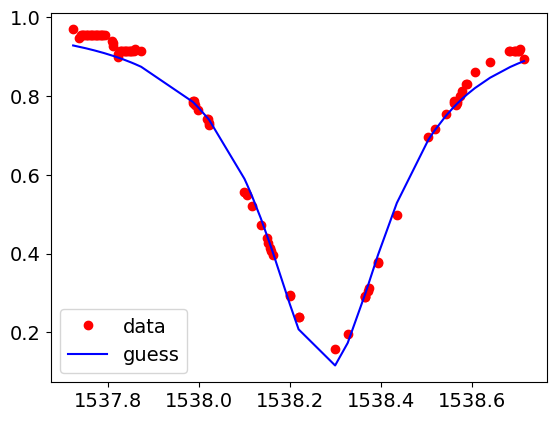

In [10]:
#276 = 2.5180, 723
#2 = 
new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.51819622, 1450)



plt.plot(x, y, 'ro', label='data')
plt.plot(x, ans, 'b-', label ="guess")
plt.legend()

plt.show()


In [11]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.51819622, 700]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [12]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_params_arr)

[[   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.51819622 1343.74383687]
 [   2.5

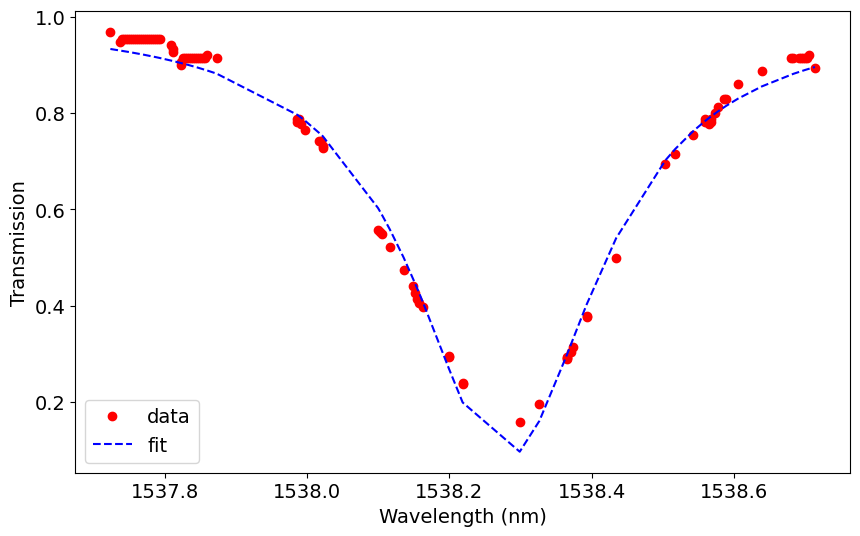

[0.9684575429956832 0.9472512814506461 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9402862237655718 0.9265093722481241
 0.9333723795541623 0.8995582771959291 0.9062216474904169
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9196968280480387 0.9129343759030023 0.7818651722098552
 0.7876567449126682 0.7818651722098552 0.7876567449126682
 0.7761161844459621 0.7647447135436454 0.7424991668900086
 0.7424991668900086 0.7262407034768004 0.731620244583664
 0.556795825684

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

print(y)

In [14]:
length = len(clean_data)
print(clean_voltages.mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

In [15]:
#print(y)
print(y[~y.mask])

[0.9684575429956832 0.9472512814506461 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9402862237655718 0.9265093722481241
 0.9333723795541623 0.8995582771959291 0.9062216474904169
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9196968280480387 0.9129343759030023 0.7818651722098552
 0.7876567449126682 0.7818651722098552 0.7876567449126682
 0.7761161844459621 0.7647447135436454 0.7424991668900086
 0.7424991668900086 0.7262407034768004 0.731620244583664
 0.556795825684

In [16]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []
first = 20
last = 140

def Guess(wavelength,neff):
    return Tsymthru(wavelength, neff, 0.9959, 735, 1.75e-6)

neff = np.zeros((len(clean_voltages)))
neff_guess = 2.51819078

for n in range(0, length):
    
    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])


    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[neff_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        neff_guess = fit_params_arr[12][0]
        neff[n] = neff_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        print(len(trans))
        fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [2.51819078]
[2.51818999]
144
Guess is  [2.51818999]
[2.5181974]
144
Guess is  [2.5181974]
[2.5181989]
144
Guess is  [2.5181989]
[2.51819618]
144
Guess is  [2.51819618]
[2.51819942]
144
Guess is  [2.51819942]
[2.51820699]
144
Guess is  [2.51820699]
[2.51819361]
144
Guess is  [2.51819361]
[2.51819708]
144
Guess is  [2.51819708]
[2.51817729]
144
Guess is  [2.51817729]
[2.51820552]
144
Guess is  [2.51820552]
[2.51820552]
144
Guess is  [2.51820552]
[2.51820634]
144
Guess is  [2.51820634]
[2.51820773]
144
Guess is  [2.51820773]
[2.51821208]
144
Guess is  [2.51821208]
[2.51820372]
144
Guess is  [2.51820372]
[2.51821034]
144
Guess is  [2.51821034]
[2.5182068]
144
Guess is  [2.5182068]
[2.51819853]
144
Guess is  [2.51819853]
[2.51820556]
144
Guess is  [2.51820556]
[2.51816892]
144
Guess is  [2.51816892]
[2.51817036]
144
Guess is  [2.51817036]
[2.51817036]
144
Guess is  [2.51817036]
[2.51817036]
144
Guess is  [2.51817036]
[2.5181689]
144
Guess is  [2.5181689]
[2.51817806]
144
Guess is

In [17]:
print(neff[276])

2.5180151163905777


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


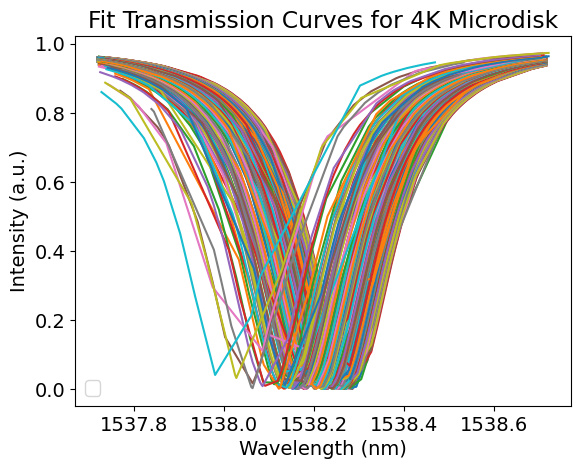

In [18]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(len(fits)):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()


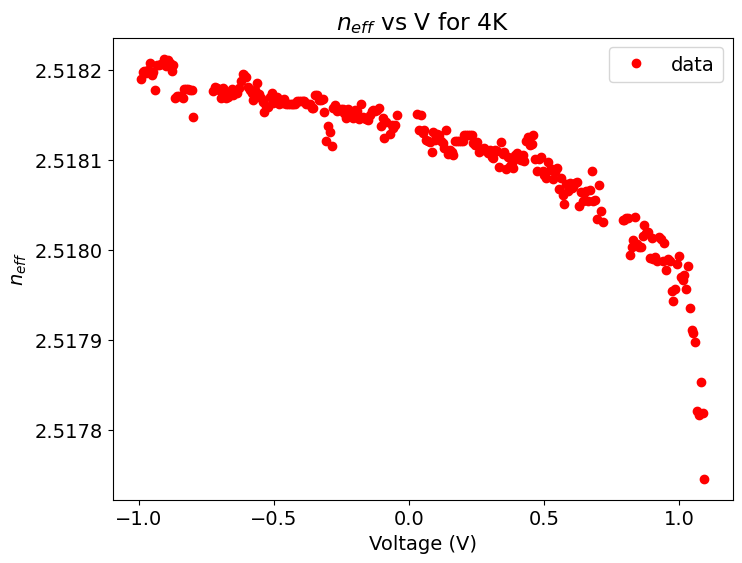

In [19]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(clean_voltages  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for 4K')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
plt.savefig("figures/Gehl-4K-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

In [20]:
# now lets try again with r

fits_alph = []

j = 0

alph = np.zeros((len(clean_voltages)))
alph_guess = 1313

for n in range(0, length):
    
    def Guess(wavelength,alph_guess):
        return Tsymthru(wavelength, neff[n], 0.996, alph_guess,   1.75e-6)

    

    first = 0
    last = 143

    line = []
    line.append(clean_data[n][0][first:last])


    x = np.ma.masked_array(clean_data[n][0][first:last])
    y = np.ma.masked_array(clean_data[n][1][first:last])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[alph_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        alph_guess = fit_params_arr[12][0]
        alph[n] = alph_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_alph.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [1313.]
[1371.48126604]
Guess is  [1371.48126604]
[1480.81018464]
Guess is  [1480.81018464]
[1422.45023512]
Guess is  [1422.45023512]
[1476.05867776]
Guess is  [1476.05867776]
[1490.33398131]
Guess is  [1490.33398131]
[1460.06082009]
Guess is  [1460.06082009]


C:\Users\madel\AppData\Local\Temp\ipykernel_22268\579435365.py:5: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[1453.00187115]
Guess is  [1453.00187115]
[1473.62695572]
Guess is  [1473.62695572]
[1451.46096218]
Guess is  [1451.46096218]
[1483.53769454]
Guess is  [1483.53769454]
[1483.53769454]
Guess is  [1483.53769454]
[1476.12586908]
Guess is  [1476.12586908]
[1483.24955661]
Guess is  [1483.24955661]
[1478.68636773]
Guess is  [1478.68636773]
[1445.15582901]
Guess is  [1445.15582901]
[1428.19549329]
Guess is  [1428.19549329]
[1438.76629307]
Guess is  [1438.76629307]
[1455.03137826]
Guess is  [1455.03137826]
[1434.30267239]
Guess is  [1434.30267239]
[1393.05494466]
Guess is  [1393.05494466]
[1388.60768469]
Guess is  [1388.60768469]
[1388.60768469]
Guess is  [1388.60768469]
[1388.60768469]
Guess is  [1388.60768469]
[1393.7781686]
Guess is  [1393.7781686]
[1438.5715222]
Guess is  [1438.5715222]
[1430.31411515]
Guess is  [1430.31411515]
[1433.67191373]
Guess is  [1433.67191373]
[1434.37814996]
Guess is  [1434.37814996]
[1434.37814996]
Guess is  [1434.37814996]
[1377.35386692]
Guess is  [1377.353866

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


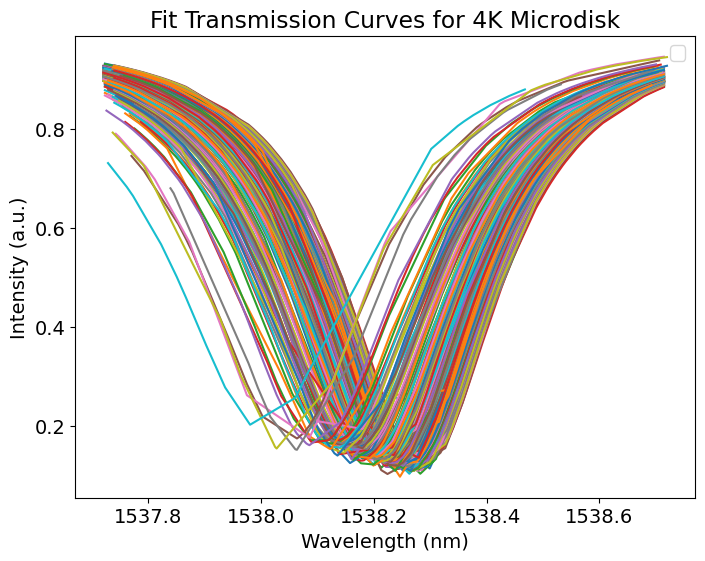

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(len(fits_alph)):
    plt.plot(fits_alph[i][0], fits_alph[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-fit-Curves.png")
plt.show()

In [22]:
# # now lets try again with r

# fits_r = []

# r = np.zeros((len(clean_voltages)))
# r_guess =  0.9959

# for n in range(0, length):
    
#     def Guess(wavelength,r):
#         return Tsymthru(wavelength, neff[n], r, 1735,   1.75e-6)

#     line = []
#     line.append(clean_data[n][0])

#     x = np.ma.masked_array(clean_data[n][0])
#     y = np.ma.masked_array(clean_data[n][1])
    
#     fit_params_arr=np.zeros([len(y)+1,1])
#     #fit_params_arr[0]=[neff[n], r[n]]
#     fit_params_arr[0]=[r_guess]
    
#     if clean_voltages.mask[n] == False:
#         print("Guess is ", fit_params_arr[0])
#         for i in range(len(y)):
#             fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i]) #, bounds=((720,760)))
#             fit_params_arr[i+1]=fit_params_arr[i]
#         fit_params_arr=fit_params_arr[:-1]

#         r_guess = fit_params_arr[12][0]
#         r[n] = r_guess    #grab a number from near the middle
#         #r.append(fit_params_arr[12][1])
        
#         print(fit_params_arr[12])
#         #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
#         fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
#         trans = fit_ans.tolist()
#         line.append(trans)
#         fits_r.append(line)

#     #plt.figure(figsize=(10,6))
#     #plt.plot(x, y, 'o', color ='red', label = f'{n}')
#     #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#     #plt.xlabel('Wavelength (nm)')
#     #plt.ylabel('Transmission')
#     #plt.legend()
#     #plt.show()
    


So for some reason if the r about = to 1 and alpha is way off, the fit is great, but if they're both around 1, the fit is horrid. let's see if we can use this to our advantage

In [23]:
# for i in range(len(fits_r)):
#     plt.plot(fits_r[i][0], fits_r[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
# plt.legend()
# plt.title("Fit Transmission Curves for 4K Microdisk")
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity (a.u.)')
# #plt.savefig("Gehl-4K-Curves.png")
# plt.show()

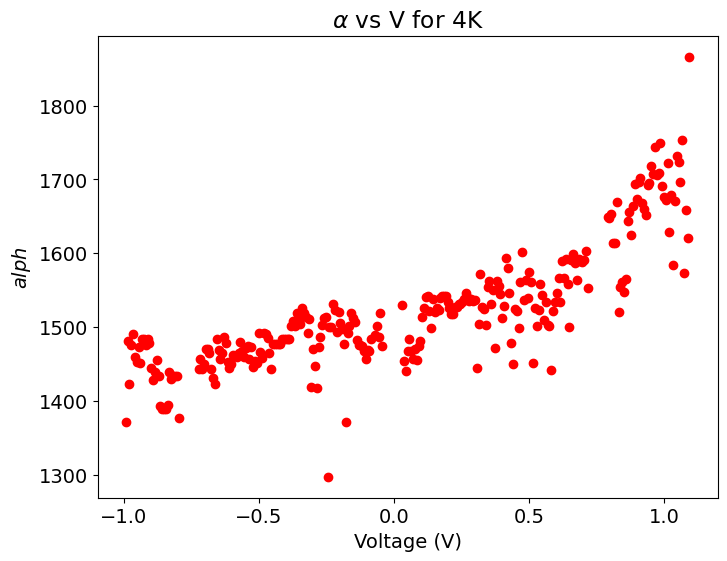

In [24]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(clean_voltages  , alph,  'o', color ='red', label ="data")
plt.title('$\\alpha$ vs V for 4K')
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$alph$')

plt.savefig("figures/Gehl-4K-Alpha.png",bbox_inches='tight')
plt.show()

In [25]:
new_alph = np.delete(alph, np.where(alph == 0))
new_neff = np.delete(neff, np.where(neff == 0))
print(new_neff)

[2.51818999 2.5181974  2.5181989  2.51819618 2.51819942 2.51820699
 2.51819361 2.51819708 2.51817729 2.51820552 2.51820552 2.51820634
 2.51820773 2.51821208 2.51820372 2.51821034 2.5182068  2.51819853
 2.51820556 2.51816892 2.51817036 2.51817036 2.51817036 2.5181689
 2.51817806 2.51817799 2.51817789 2.51817699 2.51817699 2.51814756
 2.5181762  2.51818019 2.51817928 2.51817718 2.51816828 2.51818008
 2.51817785 2.51816795 2.51816919 2.518172   2.51817887 2.51817219
 2.51817671 2.5181736  2.518179   2.51818774 2.51819464 2.51819387
 2.51819149 2.51818111 2.51817766 2.51817349 2.51816593 2.51817728
 2.51818528 2.51817342 2.51816791 2.51816381 2.51815266 2.51815973
 2.51815898 2.5181691  2.51817401 2.51816246 2.51816869 2.51816902
 2.51816159 2.51816367 2.51816309 2.51816685 2.51816149 2.51816174
 2.51816174 2.51816174 2.51816174 2.51816174 2.51816525 2.51816525
 2.51816525 2.51816525 2.51816525 2.51816136 2.51816201 2.51816168
 2.51815695 2.51815769 2.51817131 2.51817189 2.51816594 2.51816

In [26]:
np.savetxt("data/alpha-4K.csv", new_alph, delimiter = ",")
np.savetxt("data/neff-4K.csv", new_neff, delimiter = ",")